In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format


In [234]:
crime = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")


In [235]:
crime.columns = ["city", "population","Violent crime","Murder","Rape (revised)","Rape (legacy)"
                 ,"Robbery","Aggravated assault","Property crime","Burglary","Larceny-theft","Motor vehicle theft","Arson3"]

In [236]:
# I reviewed the dataframe and saw some bad rows; I dropped them here:
crime = crime.drop([0,1,2,3,352,353,354])
crime.head()

,city,population,Violent crime,Murder,Rape (revised),Rape (legacy),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [237]:
# Need to see how I can work with these columns
crime.dtypes

city                   object
population             object
Violent crime          object
Murder                 object
Rape (revised)         object
Rape (legacy)          object
Robbery                object
Aggravated assault     object
Property crime         object
Burglary               object
Larceny-theft          object
Motor vehicle theft    object
Arson3                 object
dtype: object

In [238]:
# I tried to make these into numerics but the commas are causing a problem, so I removing them.
crime['Murder'] = crime['Murder'].str.replace(',', '')
crime['Robbery'] = crime['Robbery'].str.replace(',', '')
crime['population'] = crime['population'].str.replace(',', '')
crime['Violent crime'] = crime['Violent crime'].str.replace(',', '')
crime['Rape (revised)'] = crime['Rape (revised)'].str.replace(',', '')
crime['Aggravated assault'] = crime['Aggravated assault'].str.replace(',', '')
crime['Property crime'] = crime['Property crime'].str.replace(',', '')
crime['Burglary'] = crime['Burglary'].str.replace(',', '')
crime['Larceny-theft'] = crime['Larceny-theft'].str.replace(',', '')
crime['Motor vehicle theft'] = crime['Motor vehicle theft'].str.replace(',', '')
crime['Arson3'] = crime['Arson3'].str.replace(',', '')


In [239]:
#Now, I can make these fiels numeric
crime[['Murder','Robbery','population','Violent crime','Rape (revised)','Aggravated assault','Property crime','Burglary','Larceny-theft','Motor vehicle theft','Arson3']] = crime[['Murder','Robbery','population','Violent crime','Rape (revised)','Aggravated assault','Property crime','Burglary','Larceny-theft','Motor vehicle theft','Arson3']].apply(pd.to_numeric)

In [240]:
#Checking
crime.dtypes

city                    object
population               int64
Violent crime            int64
Murder                   int64
Rape (revised)         float64
Rape (legacy)           object
Robbery                  int64
Aggravated assault       int64
Property crime           int64
Burglary                 int64
Larceny-theft            int64
Motor vehicle theft      int64
Arson3                 float64
dtype: object

In [241]:
#create the population squared column
crime['popsqrd'] = crime['population'] *  crime['population']

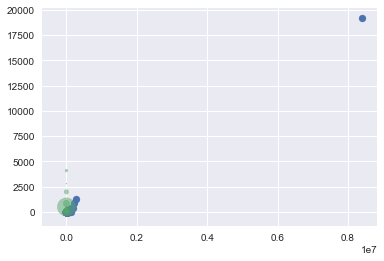

In [280]:
#plt.subplot(2,3,1)
plt.scatter(crime['population'], crime['Robbery'])

plt.scatter(x, y, s=area, alpha=0.5)
plt.show()

In [283]:
# there is a really big city in there, let me find it:
big_city = crime.query('population > 30000')
print(big_city)

                         city  population  Violent crime  Murder  \
7                      Albany       97956            791       8   
11               Amherst Town      118296            107       1   
25             Bethlehem Town       34243             13       0   
26                 Binghamton       46304            284       3   
35              Brighton Town       36689             26       1   
39                    Buffalo      258789           3249      47   
49                Carmel Town       34462             10       0   
57           Cheektowaga Town       78361            158       0   
61            Clarkstown Town       80705             65       0   
66               Colonie Town       78215             63       0   
112          Freeport Village       43214            152       0   
130               Greece Town       96667            151       0   
131           Greenburgh Town       44787             48       1   
137          Guilderland Town       33805       

In [284]:
# Hmmm, NYC is in here...maybe remove it as an outlier?
crime_filter = crime.query('population<30000')

In [285]:
#create the population squared column
crime_filter['popsqrd'] = crime_filter['population'] *  crime_filter['population']
crime_filter['logpop'] = [math.sqrt(x) for x in  crime_filter['population']]
crime['logpop'] = [math.sqrt(x) for x in  crime['population']]
crime_filter.head()

# try squareroot
# try inverse

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,city,population,Violent crime,Murder,Rape (revised),Rape (legacy),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3,popsqrd,logpop
4,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000,3463321,43.139
5,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000,6640929,50.764
6,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000,8099716,53.348
8,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan,40806544,79.925
9,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan,16719921,63.945


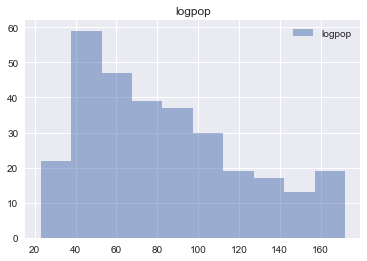

In [286]:
# Look at the histogram  w/o "big cities"
plt.hist(crime_filter['logpop'], label = 'logpop', alpha = 0.5)
plt.title('logpop')
plt.legend(loc='best')
plt.show()

In [287]:
#which cities am I removing?
big_city = crime.query('population>=5000')
big_city.head(10)

,city,population,Violent crime,Murder,Rape (revised),Rape (legacy),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson3,popsqrd,logpop
7,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan,9595377936,312.979
8,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan,40806544,79.925
11,Amherst Town,118296,107,1,nan,7,31,68,2118,204,1882,32,3.000,13993943616,343.942
12,Amityville Village,9519,9,0,nan,2,4,3,210,16,188,6,1.000,90611361,97.565
13,Amsterdam,18182,30,0,nan,0,12,18,405,99,291,15,0.000,330585124,134.841
18,Auburn,27270,96,1,nan,20,22,53,859,132,721,6,nan,743652900,165.136
20,Baldwinsville Village,7473,5,0,nan,0,1,4,88,10,77,1,0.000,55845729,86.447
21,Ballston Spa Village,5418,8,0,nan,0,3,5,94,16,78,0,1.000,29354724,73.607
22,Batavia,15374,57,0,nan,7,13,37,559,103,454,2,nan,236359876,123.992
23,Bath Village,5733,15,0,nan,1,3,11,191,32,157,2,2.000,32867289,75.717


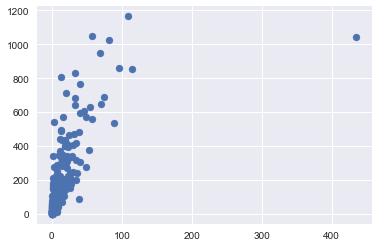

In [288]:
x = crime_filter['Violent crime']
y = crime_filter['Property crime']
#colors = crime['city']
#area = crime_filter['Murder']

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x, y, alpha=1)
plt.show()

I may want to remove some of the outliers here (100 or 140 robberies) however since these are going to turn into categorical variables, it may not be worth it.

Formula:Propertycrime=α+Population+Population2+Murder+Robbery 

For Murder & Robbery, use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.

In [289]:
#Translate the two continuous variables into categorical
crime_filter['Murder_bool'] = np.where((crime_filter['Murder'] > 0),1,0)
crime_filter['Robbery_bool'] = np.where((crime_filter['Robbery'] > 0),1,0)

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [290]:
# Instantiate and fit our model.
from sklearn import linear_model
regr = linear_model.LinearRegression()
Y = crime_filter['Property crime']   #.values.reshape(-1, 1)
#X = crime_filter[['population','Murder','Robbery']]   ## pretty good (93)
#X = crime_filter[['popsqrd','Murder','Robbery']] ## pretty good (67)
X = crime_filter[['popsqrd','Murder_bool','Robbery_bool']] ##  good (57)
#X = crime_filter[['logpop','Murder_bool','Robbery_bool']] ##  right skewed residuals (58)
#X = crime_filter[['population','Murder_bool','Robbery_bool']] ##  ok (60)
#X = crime_filter[['population']] ##  ok (56)
#X = crime_filter[['Murder_bool','Robbery_bool']]  ## 32%
#X = crime_filter[['logpop','population','Murder_bool','Robbery_bool']]  ## 83%
#X = crime_filter[['popsqrd','population','Murder_bool','Robbery_bool']]  ## 84%

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [  5.85214162e-07   9.15964890e+01   1.08046111e+02]

Intercept: 
 26.5033398921

R-squared:
0.611284669347


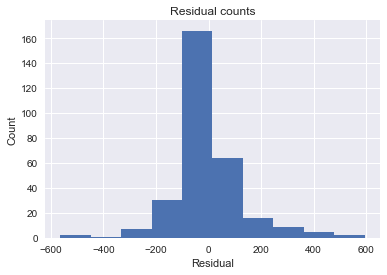

In [291]:
predicted = regr.predict(X).ravel()
actual = crime_filter['Property crime']
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


In [296]:
#Assumption three: homoscedasticity
#The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or homoscedastic.

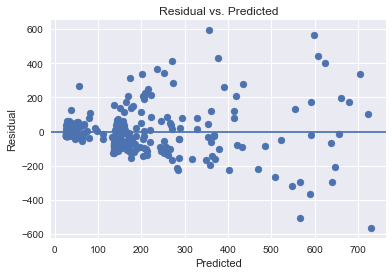

In [297]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
# Could try PCA